# Coding ARIMA from scratch!

Good luck Kiefer...

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import prettyplotlib as ppl

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## Part 1: Make fake timeseries with a "random walk"

In [2]:
# create empty timeseries list:
dts = []

# iterate through 120 indicies (timepoints):
for ind in range(120):
    timepoint = np.random.normal(0, 1.5)
    dts.append(timepoint)

# make 'differenced' timeseries values an array:
dts = np.array(dts)

# turn the differenced timeseries into a normal timeseries
# this is what people call a 'random walk'
ts = np.cumsum(dts)

# make the x-axis time points:
x_times = np.arange(120)


In [3]:
print ts[0:5]
print x_times[0:5]

[ 1.02465985 -1.34174476  2.08452847  2.78324238  1.19758146]
[0 1 2 3 4]


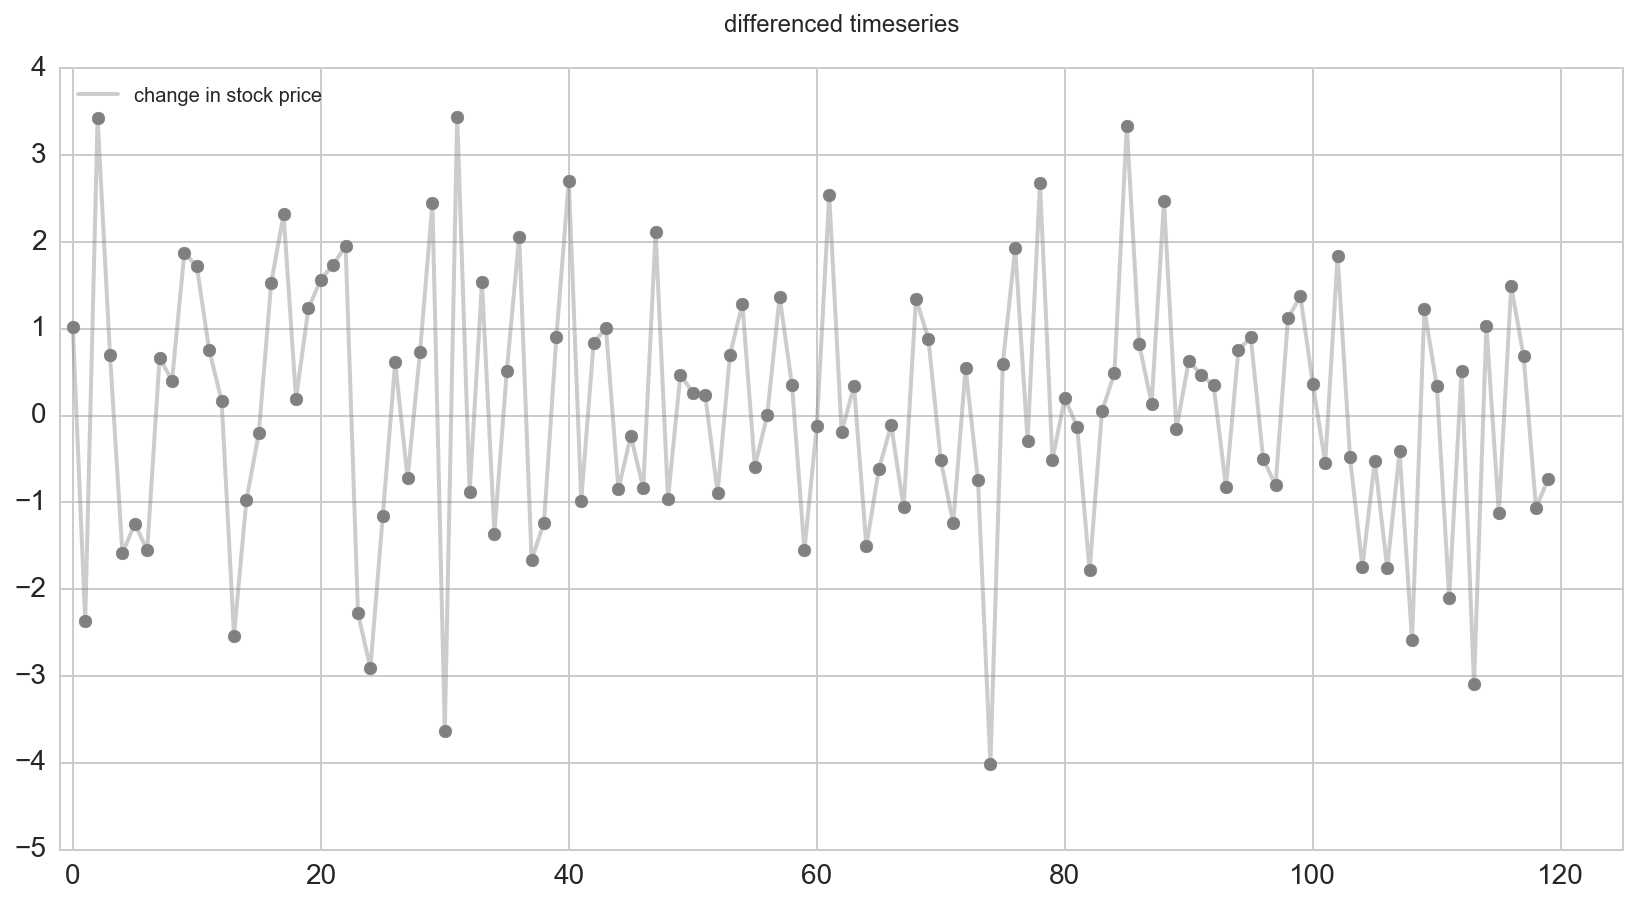

In [4]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries\n')

plt.plot(x_times, dts, lw=2, color='grey', alpha=0.4, label="change in stock price")
plt.scatter(x_times, dts, s=40, color='grey')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

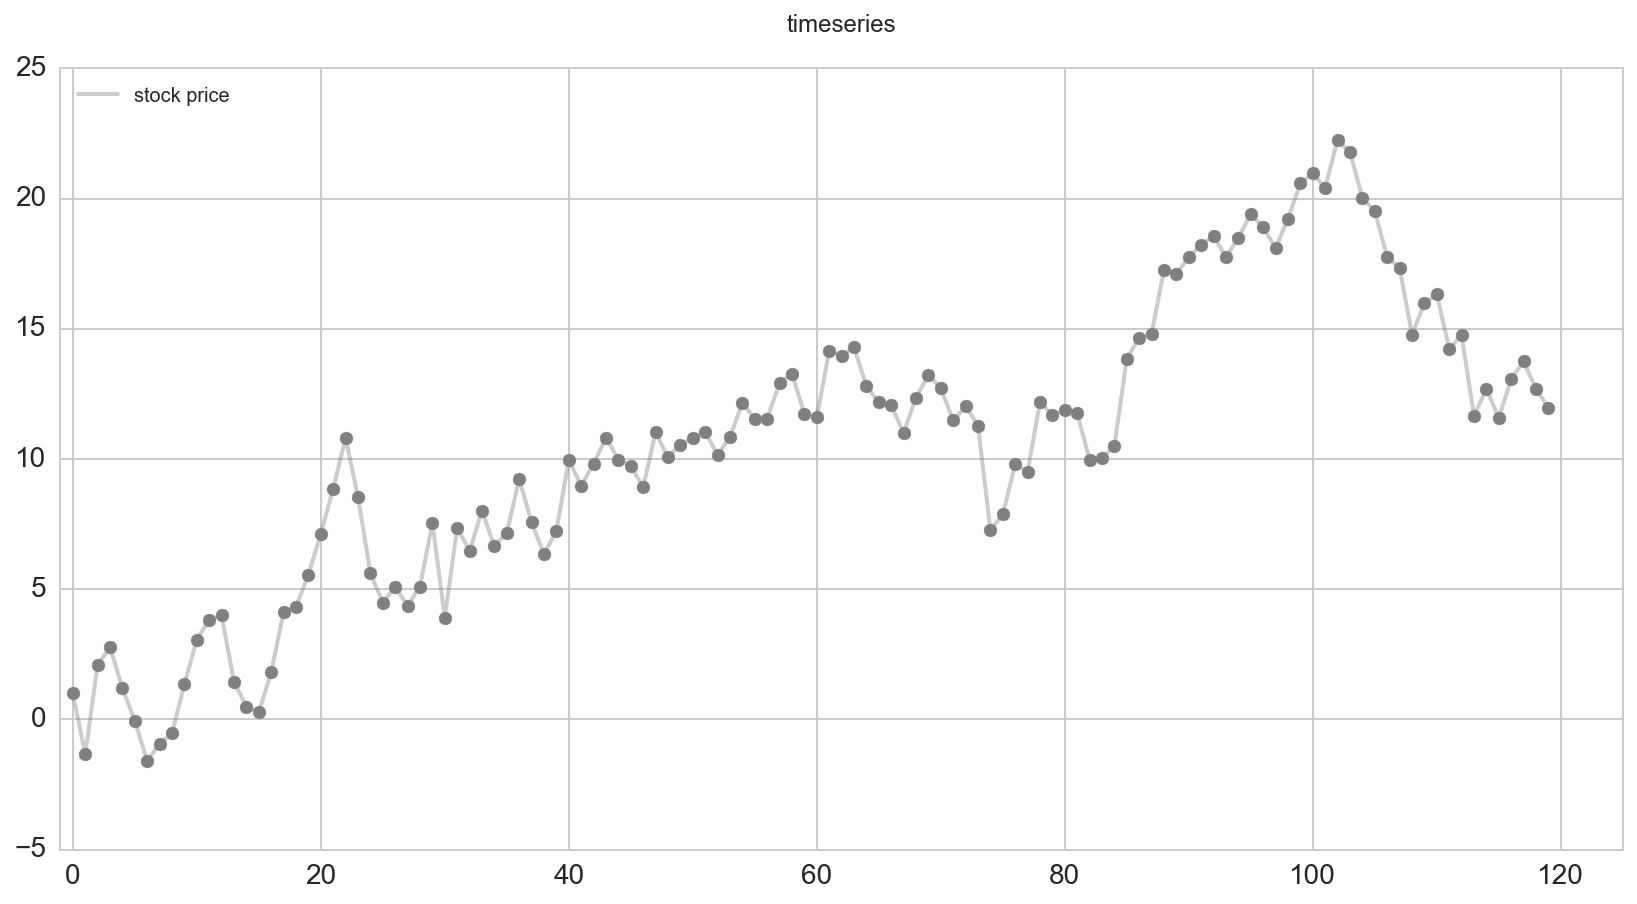

In [5]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('timeseries\n')

# plot lag 2:
#plt.plot(x_times[:-2], ts[2:], lw=2, color='darkred', alpha=0.5, label="lag-2 timeseries")
#plt.scatter(x_times[:-2], ts[2:], s=40, color='darkred')

plt.plot(x_times, ts, lw=2, color='grey', alpha=0.4, label="stock price")
plt.scatter(x_times, ts, s=40, color='grey')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

#print 'autocorrelation lag-2', np.corrcoef(ts[:-2], ts[2:])

---

## Part 2: Make fake timeseries with a "not so random walk"

In [125]:
# create empty timeseries list with an initial random point:
dts_cor = [np.random.normal(0, 1.5)]

# iterate through 119 indicies (timepoints).
# add relationship to previous point
for ind in range(119):
    # pull out the previous change:
    previous_change = dts_cor[ind]
    
    # IF previous stock price change went up, likely to go up again.
    # IF previous stock price change went down, likely to go down again.
    
    # Add a bit of randomness to the mean change and standard deviation:
    change_std = np.random.choice([4,7], size=1, p=[0.9, 0.1])
    
    change_mean = np.random.normal(previous_change/5., change_std*1.5)
    
    timepoint = np.random.normal(change_mean, 1.5)
        
    dts_cor.append(timepoint)

# make 'differenced' timeseries values an array:
dts_cor = np.array(dts_cor)

# turn the differenced timeseries into a normal timeseries
# this is what people call a 'random walk'
ts_cor = np.cumsum(dts_cor)

# make the x-axis time points:
x_times = np.arange(120)


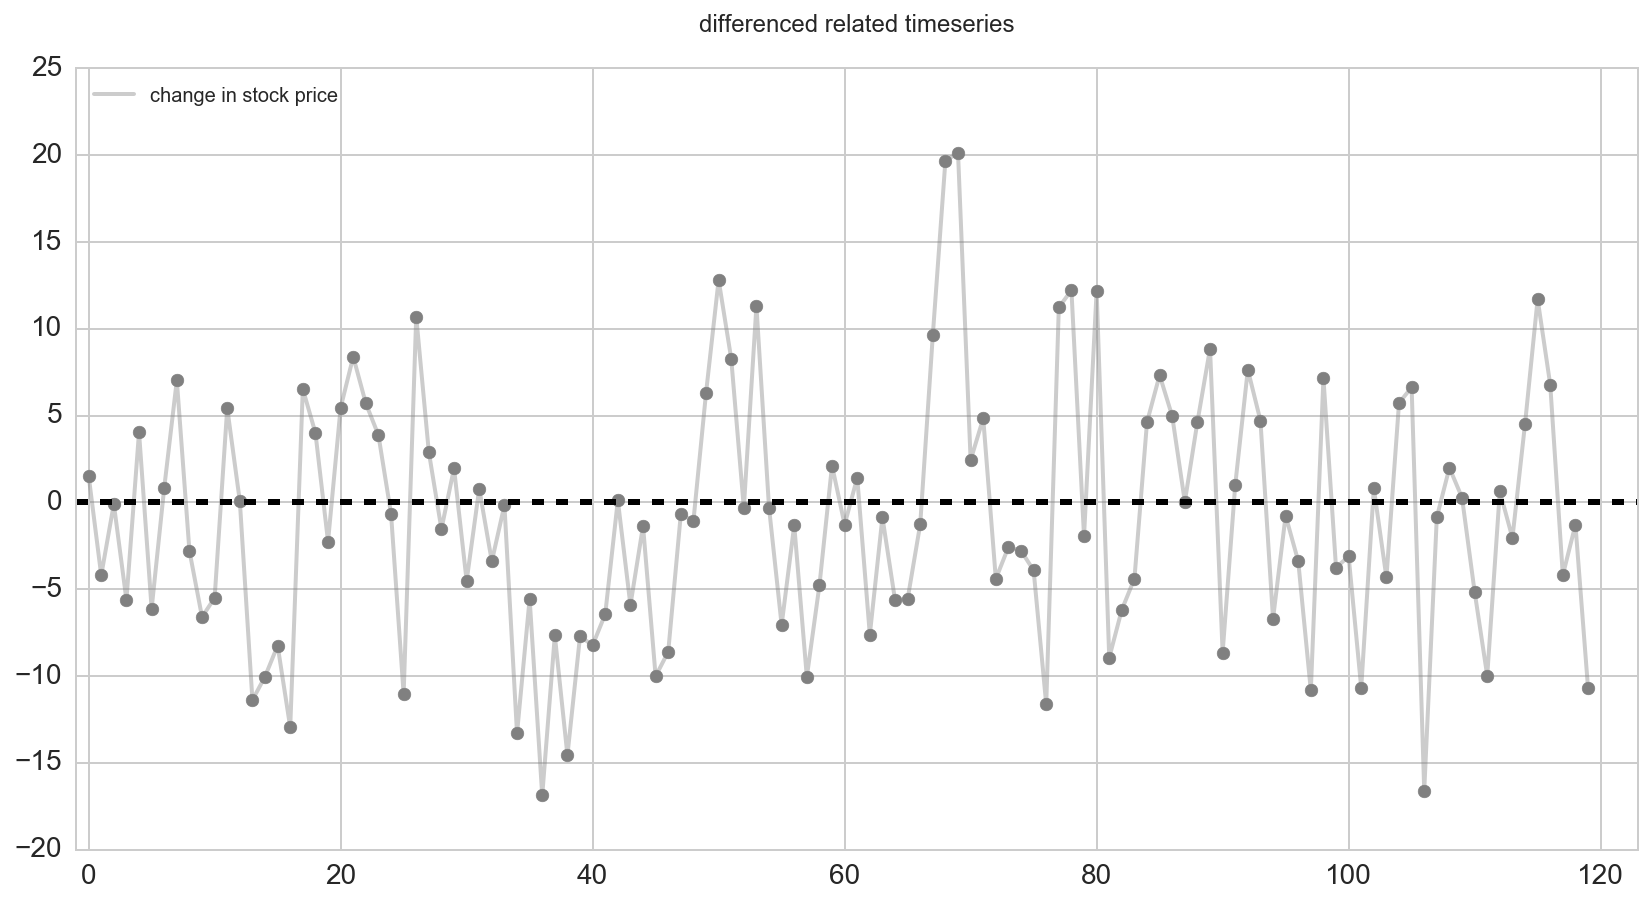

In [126]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('differenced related timeseries\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.4, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

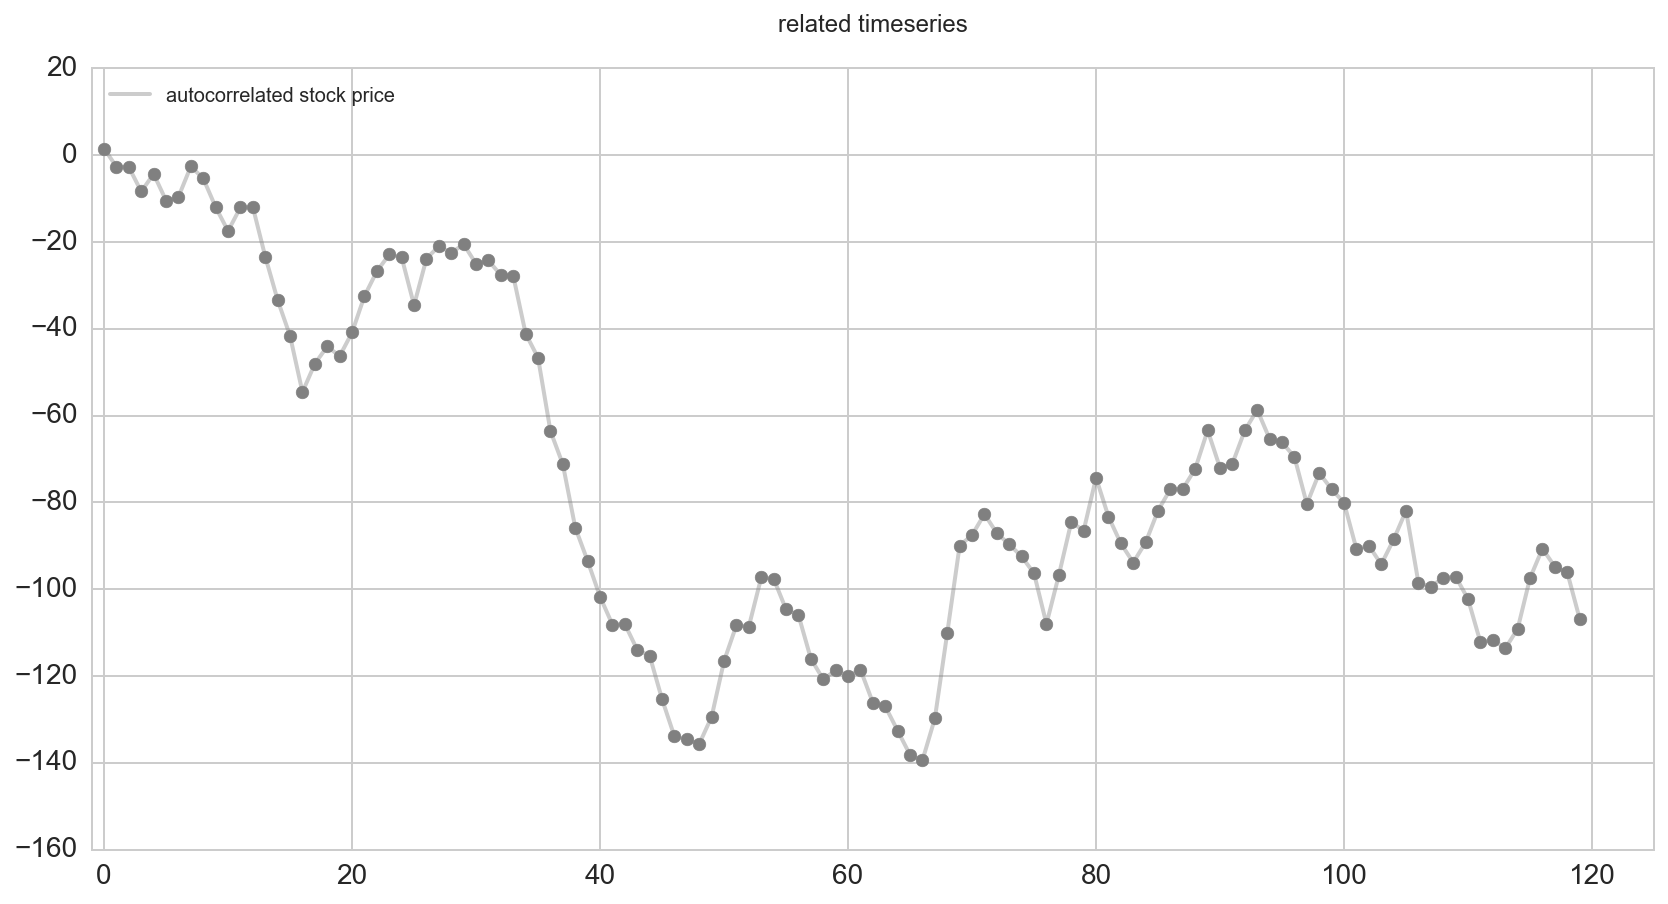

In [127]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('related timeseries\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="autocorrelated stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

---

## Part 3: Make autoregressive (AR) model component:

In [150]:
from sklearn.linear_model import LinearRegression

def make_ar_coefs(dts, lag):
    
    # depending on our lag, this will impact how much of our current
    # stock timeseries we can use:
    current_dts = dts[lag:]
    
    # collect our lagged timeseries:
    lagged_dts = []
    for current_lag in range(1,lag+1):
        current_lagged_dts = dts[lag-current_lag:-current_lag]
        lagged_dts.append(current_lagged_dts)
        
    #print 'original dts', dts
    #print 'current dts', current_dts
    #for i, ldts in enumerate(lagged_dts):
    #    print 'lag', i+1, 'lagged dts', ldts
    
    # We are predicting current timeseries from lagged timeseries:
    Y = np.array(current_dts)
    X = np.array(lagged_dts).T
    
    # make a linear regression to predict the current from lagged predictors
    ar_model = LinearRegression()
    ar_model.fit(X, Y)
    
    print ar_model.intercept_
    print ar_model.coef_
    
    return ar_model, X
    
    

In [151]:
ar_model, X = make_ar_coefs(dts_cor, 2)

-0.591702271822
[ 0.27251365  0.08135153]


In [152]:
ar_lag2_predictions = ar_model.predict(X)
print ar_lag2_predictions[0:5]


[-1.61040176 -0.9588563  -2.12897946  0.05201018 -1.93079685]


In [142]:
print dts_cor.shape, x_times[2:].shape, ar_lag2_predictions[2:].shape

(120,) (118,) (116,)


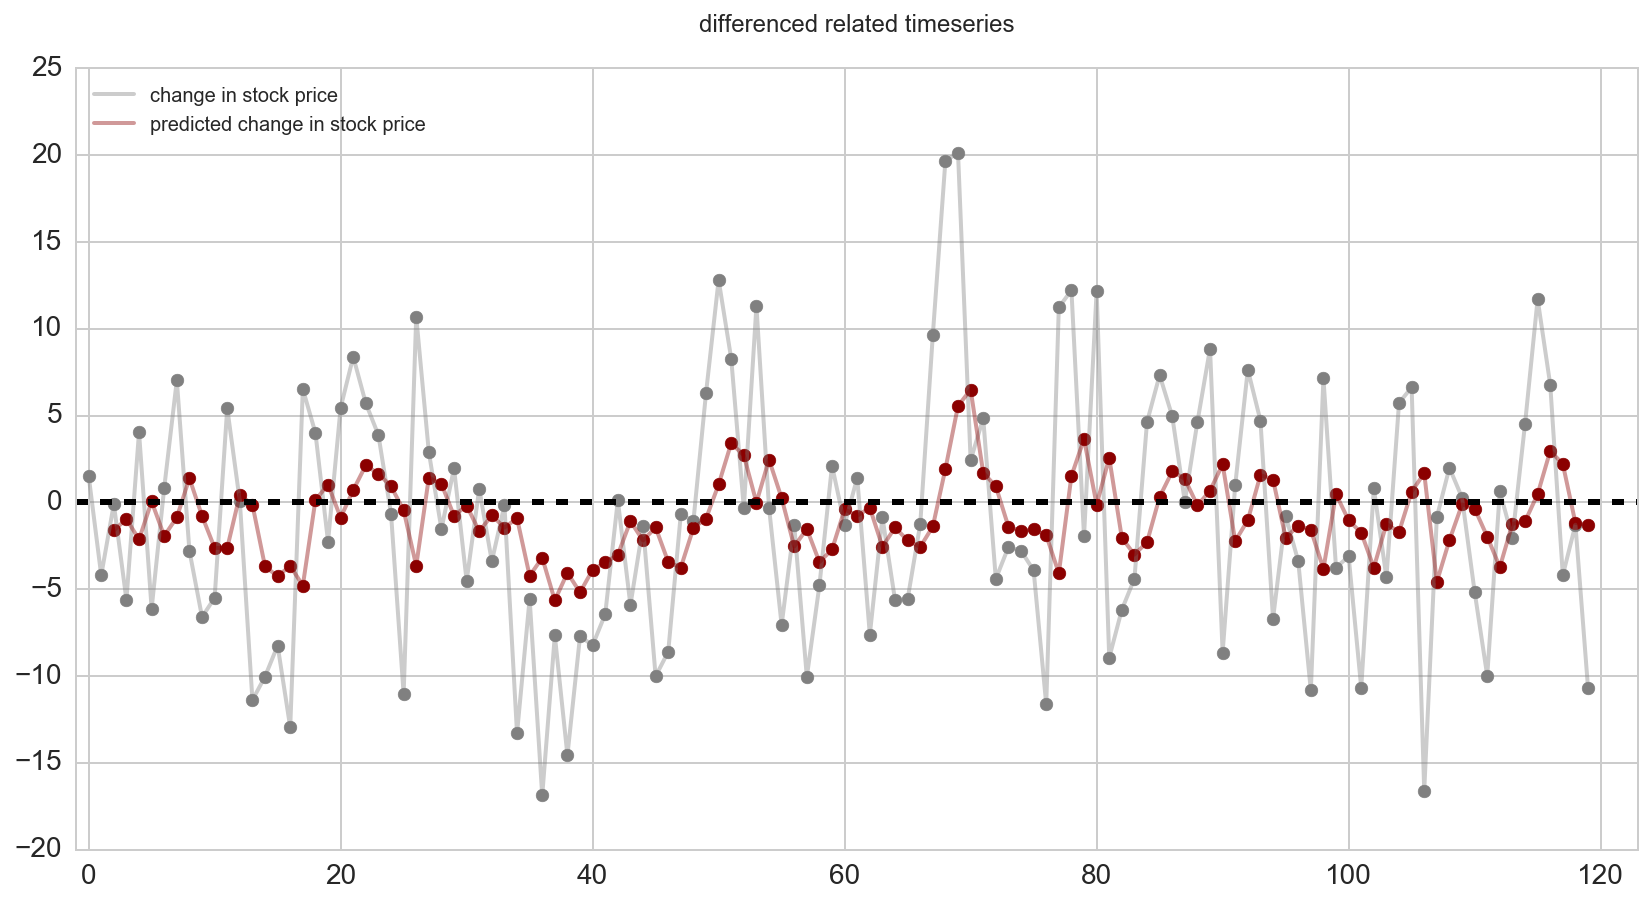

In [148]:
# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced related timeseries\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.4, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

plt.plot(x_times[2:], ar_lag2_predictions, lw=2, color='darkred', alpha=0.4, 
         label="predicted change in stock price")
plt.scatter(x_times[2:], ar_lag2_predictions, s=40, color='darkred')

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

In [154]:
ar_lag6_model, Xlag6 = make_ar_coefs(dts_cor, 6)
ar_lag6_predictions = ar_lag6_model.predict(Xlag6)

-0.620943048518
[ 0.28861346  0.07861429  0.048227   -0.1325018  -0.03216473  0.03662107]


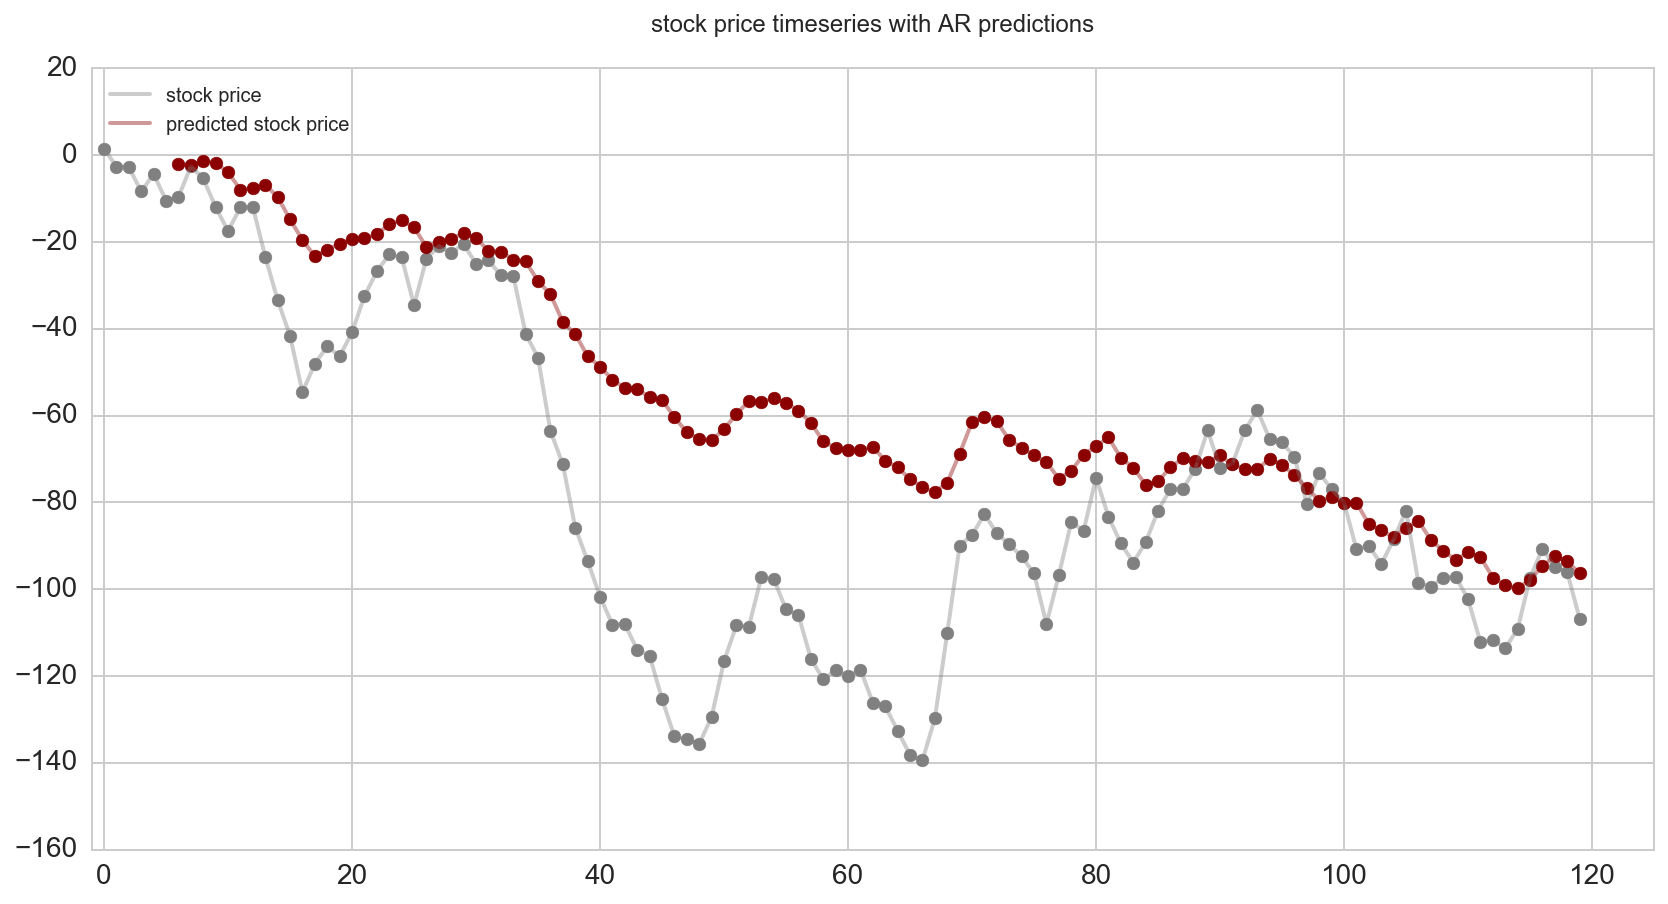

In [155]:
# plot the actual stock prices with predictions;

ar_ts = np.cumsum(ar_lag6_predictions)

plt.figure(figsize=(14,7))
plt.title('stock price timeseries with AR predictions\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.plot(x_times[6:], ar_ts, lw=2, color='darkred', alpha=0.4, 
                 label="predicted stock price")
plt.scatter(x_times[6:], ar_ts, s=40, color='darkred')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

In [156]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

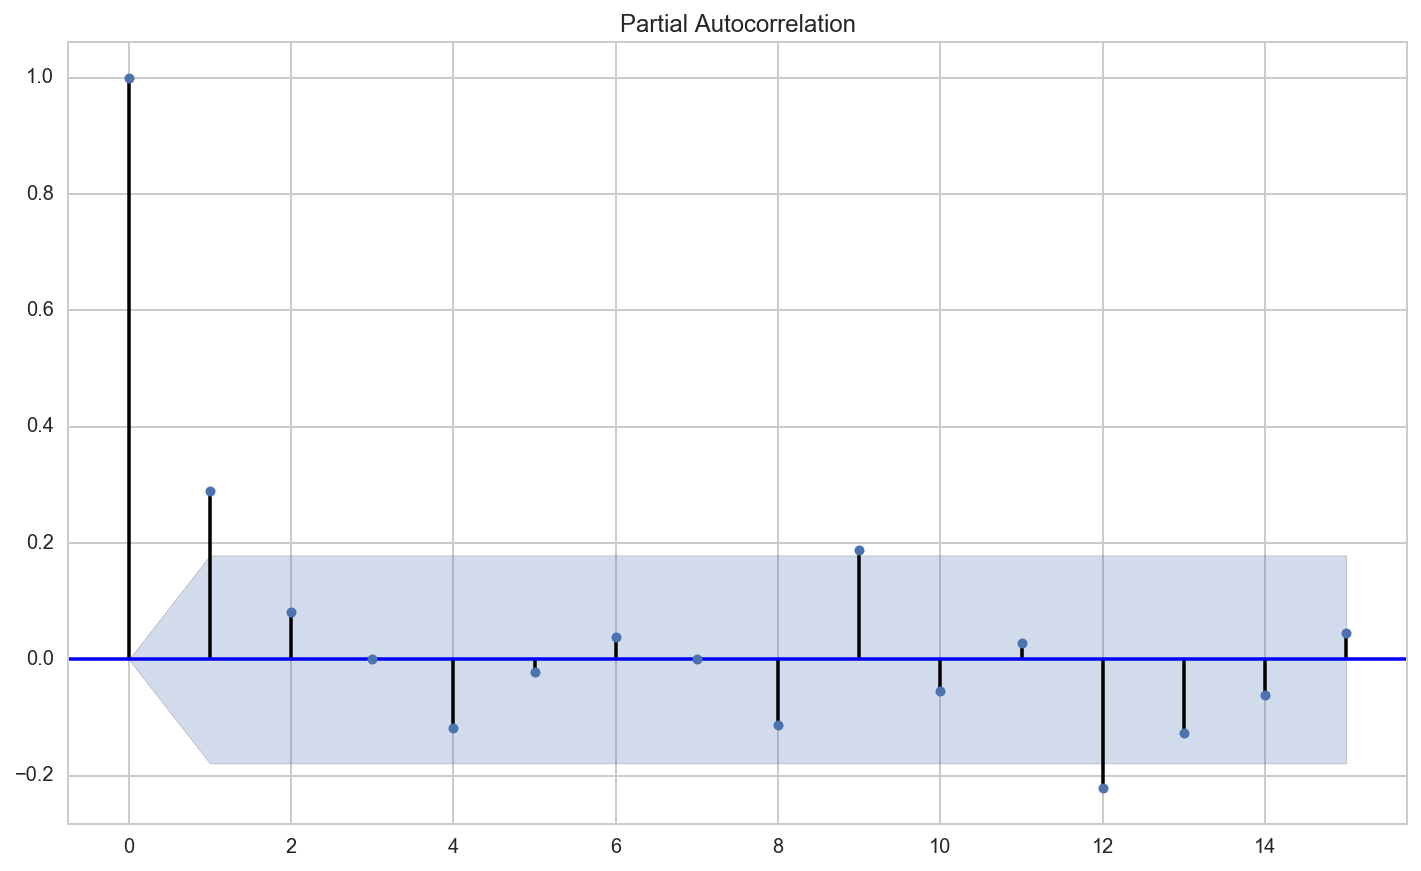

In [160]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plot_pacf(dts_cor, lags=15, ax=ax)
plt.show()

---

## Part 4: Constructing the moving average (MA) model

In [163]:
tmp = [1,2,3,4,5,6,7,8,9,10]

In [164]:
window = 5

In [171]:
for ind in range(1, len(tmp)+1):
    left_side = max(0, ind-window)
    right_side = ind
    tmp_window = tmp[left_side:right_side]
    
    rolling_mean = np.mean(tmp_window)
    
    print left_side, right_side, tmp_window, rolling_mean
    
    

0 1 [1] 1.0
0 2 [1, 2] 1.5
0 3 [1, 2, 3] 2.0
0 4 [1, 2, 3, 4] 2.5
0 5 [1, 2, 3, 4, 5] 3.0
1 6 [2, 3, 4, 5, 6] 4.0
2 7 [3, 4, 5, 6, 7] 5.0
3 8 [4, 5, 6, 7, 8] 6.0
4 9 [5, 6, 7, 8, 9] 7.0
5 10 [6, 7, 8, 9, 10] 8.0


In [207]:
def make_rolling_mean(dts, window=5):
    
    rolling_means = []
    
    for ind in range(1, len(dts)+1):
        left_side = max(0, ind-window)
        right_side = ind
        
        dts_window = dts[left_side:right_side]
    
        rolling_mean = np.mean(dts_window)
        
        rolling_means.append(rolling_mean)
        
    return np.array(rolling_means)

In [178]:
dts_cor_rm = make_rolling_mean(dts_cor, window=5)

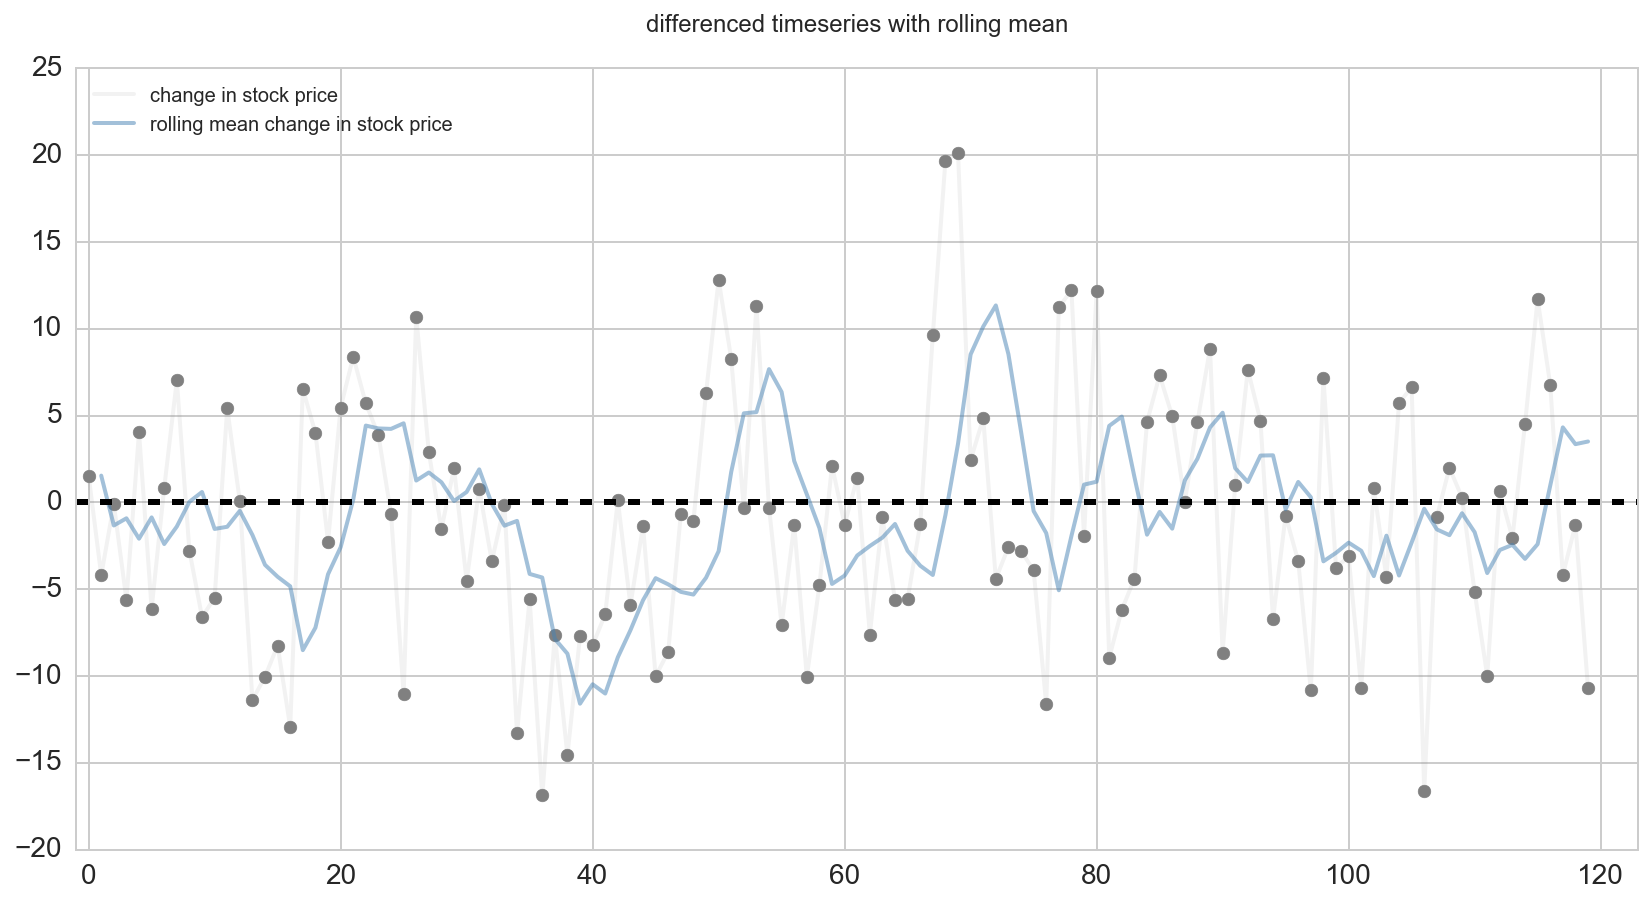

In [199]:
# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries with rolling mean\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.1, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

plt.plot(x_times, dts_cor_rm, lw=2, color='steelblue', alpha=0.5, 
         label="rolling mean change in stock price")
#plt.scatter(x_times, dts_cor_rm, s=40, color='steelblue')

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

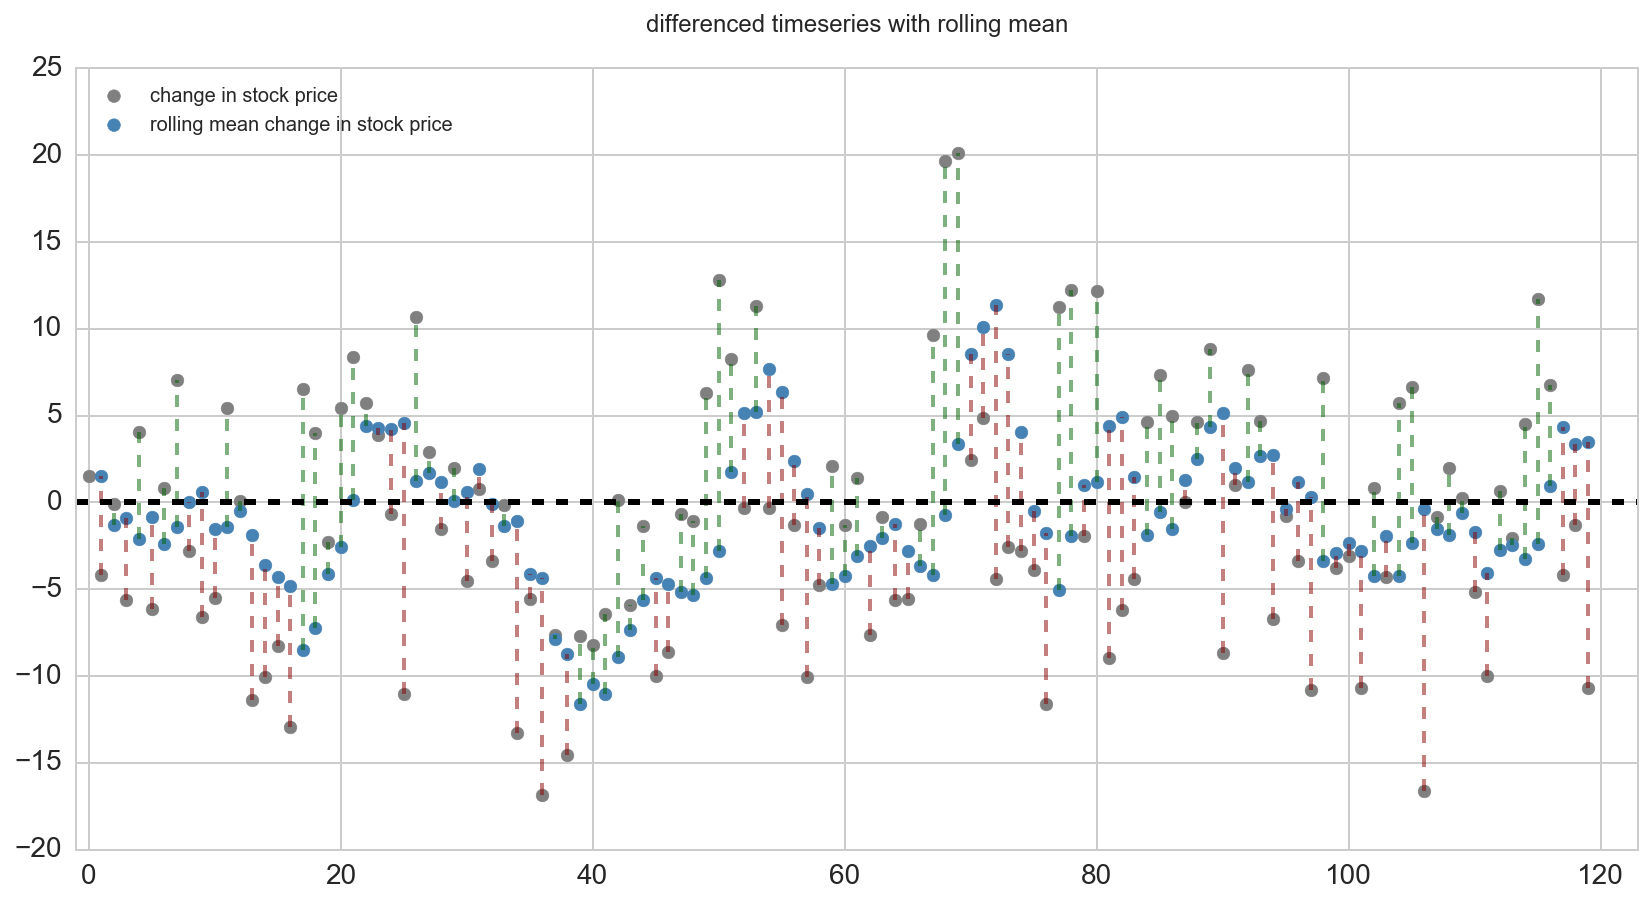

In [201]:
from scipy.interpolate import interp1d

# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries with rolling mean\n')

plt.scatter(x_times, dts_cor, s=40, color='grey',
            label="change in stock price")

plt.scatter(x_times, dts_cor_rm, s=40, color='steelblue',
           label="rolling mean change in stock price")

ylim = plt.gca().get_ylim()
interpolater = interp1d([ylim[0], ylim[1]], [0,1])

for x, dts_point, mean_point in zip(x_times, dts_cor, dts_cor_rm):
    errmin = interpolater(min(dts_point, mean_point))
    errmax = interpolater(max(dts_point, mean_point))
    
    if dts_point < mean_point:
        color = 'darkred'
    else:
        color = 'darkgreen'
    
    plt.axvline(x=x, ymin=errmin, ymax=errmax,
                ls='dashed', lw=2, 
                color=color, alpha=0.5)

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

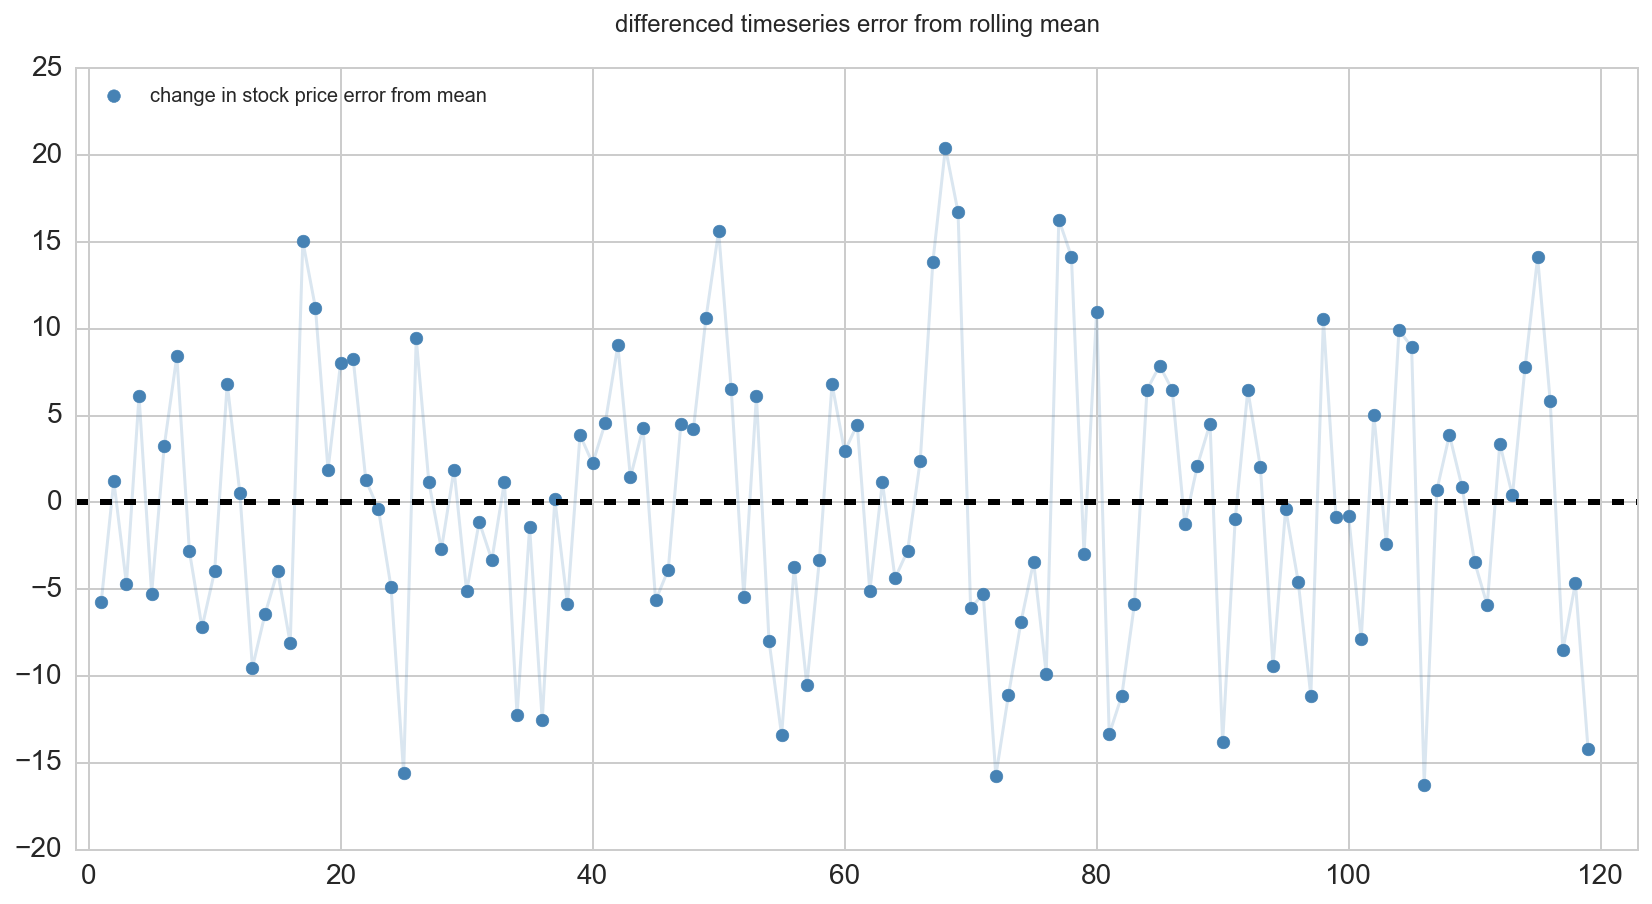

In [195]:

# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries error from rolling mean\n')

plt.plot(x_times, dts_cor_frommean_err, lw=1.5, color='steelblue', alpha=0.2)

plt.scatter(x_times, dts_cor_frommean_err, s=40, color='steelblue',
           label="change in stock price error from mean")

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

In [208]:
dts_cor_rm = make_rolling_mean(dts_cor, window=5)

In [209]:
dts_cor_frommean_err = dts_cor - dts_cor_rm

In [210]:
print dts_cor.shape, dts_cor_rm.shape

(120,) (120,)


In [211]:
print dts_cor[0:2], dts_cor_rm[0:2]

[ 1.5427593  -4.19870834] [ 1.5427593  -1.32797452]


In [212]:
dts_cor_frommean_err[0:10]

array([ 0.        , -2.87073382,  0.82273193, -3.52235157,  4.90278917,
       -3.72180052,  2.22780034,  6.99770212, -3.39072766, -5.07408908])

In [215]:
def make_ma_model(dts, dts_rm, dts_rm_err, lag):
    
    # depending on our lag, this will impact how much of our current
    # stock timeseries we can use:
    current_dts = dts[lag:]
    
    # lag the rolling mean the same way of our timeseries:
    current_rolling_mean = dts_rm[lag:]
    
    # collect our lagged error timeseries:
    lagged_error_dts = []
    for current_lag in range(1, lag+1):
        current_lagged_err = dts_rm_err[lag-current_lag:-current_lag]
        lagged_error_dts.append(current_lagged_err)
    
    # We are predicting current timeseries from lagged errors and rolling mean:
    predictors = [current_rolling_mean]
    predictors.extend(lagged_error_dts)
    
    Y = np.array(current_dts)
    X = np.array(predictors).T
    
    # make a linear regression to predict the current from lagged predictors
    ma_model = LinearRegression()
    ma_model.fit(X, Y)
    
    print ma_model.intercept_
    print ma_model.coef_
    
    return ma_model, X

In [216]:
ma_lag2_model, X_ma_lag2 = make_ma_model(dts_cor, dts_cor_rm, dts_cor_frommean_err, 2)

-0.200033891235
[ 0.82721053  0.22033866 -0.01732642]


In [218]:
ma_lag2_predictions = ma_lag2_model.predict(X_ma_lag2)

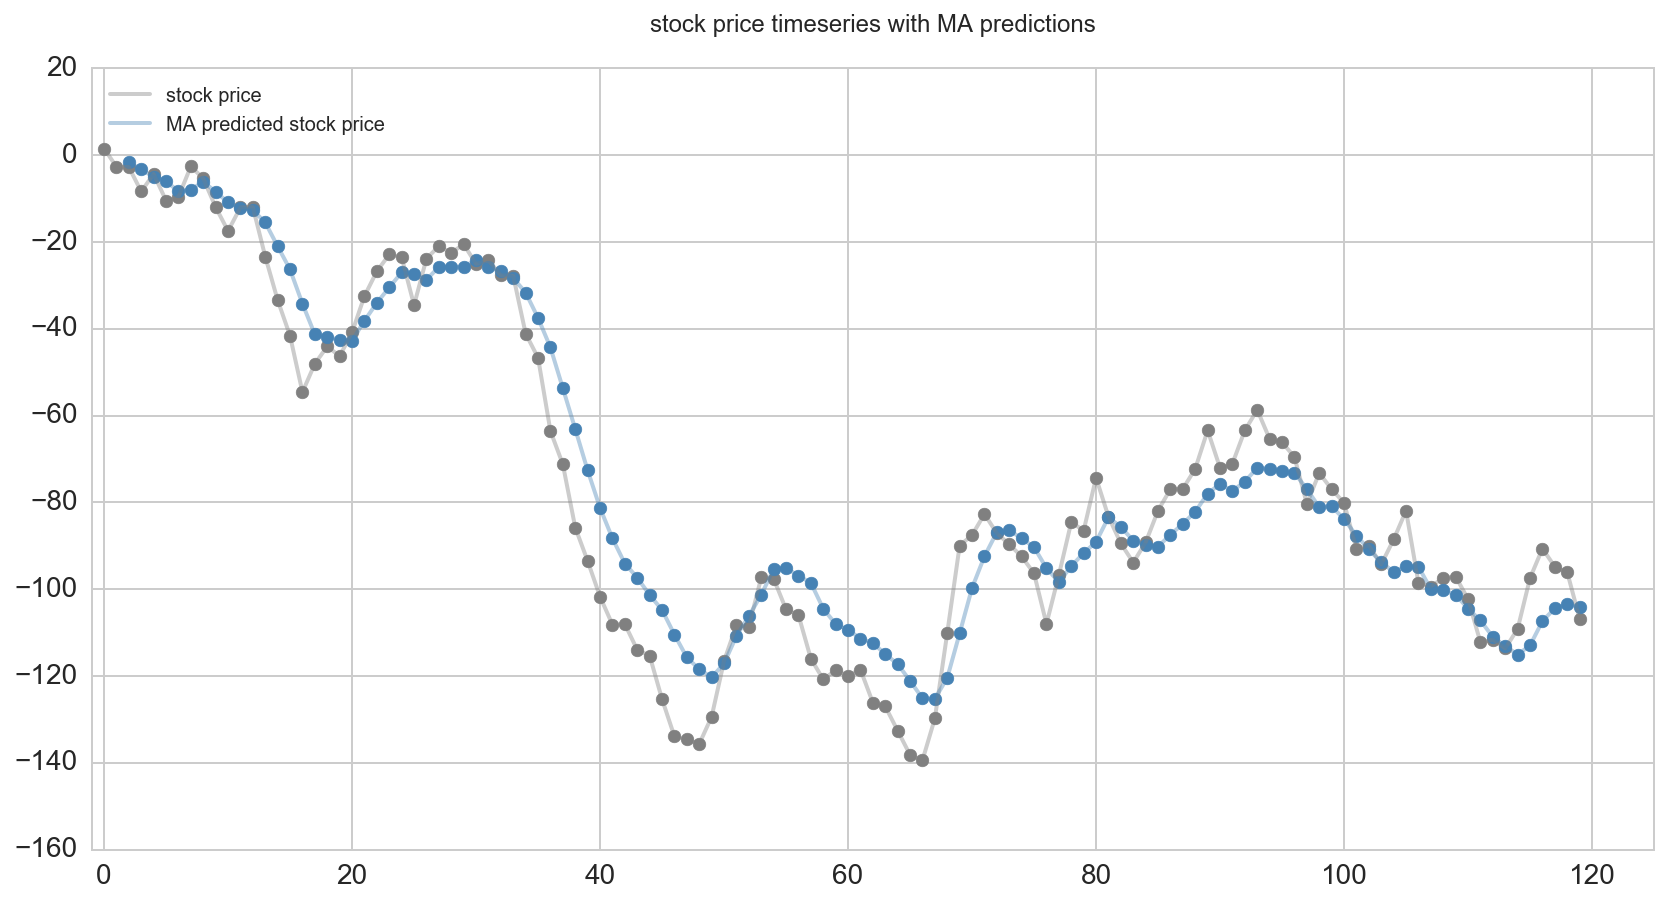

In [219]:
# plot the actual stock prices with predictions;

ma_pred_ts = np.cumsum(ma_lag2_predictions)

plt.figure(figsize=(14,7))
plt.title('stock price timeseries with MA predictions\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.plot(x_times[2:], ma_pred_ts, lw=2, color='steelblue', alpha=0.4, 
                 label="MA predicted stock price")
plt.scatter(x_times[2:], ma_pred_ts, s=40, color='steelblue')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

---

## Part 5: ARMA

In [220]:
def make_arma_model(dts, dts_rm, dts_rm_err, ar_lag, ma_lag):
    
    # calculate max lag, this is what we have to predict from
    max_lag = max(ar_lag, ma_lag)
    
    # depending on our lag, this will impact how much of our current
    # stock timeseries we can use:
    current_dts = dts[max_lag:]
    
    # SECTION 1: PREPARE AR DATA
    #
    # collect our lagged error timeseries:
    ar_lag_dts = []
    for current_lag in range(1, ar_lag+1):
        current_lagged_dts = dts[ar_lag-current_lag:-current_lag]
        ar_lag_dts.append(current_lagged_dts)
    
    # SECTION 2: PREPARE MA DATA:
    #
    # lag the rolling mean the same way of our timeseries:
    current_rolling_mean = dts_rm[max_lag:]
    
    # collect our lagged error timeseries:
    lagged_error_dts = []
    for current_lag in range(1, ma_lag+1):
        current_lagged_err = dts_rm_err[ma_lag-current_lag:-current_lag]
        lagged_error_dts.append(current_lagged_err)
        
    # SECTION 3: LIMIT PREDICTORS TO MAX LAG:
    #
    ar_adjust = max_lag - ar_lag
    if not ar_adjust == 0:
        ar_lag_dts = [ts[:-ar_adjust] for ts in ar_lag_dts]
        
    ma_adjust = max_lag - ma_lag
    if not ma_adjust == 0:
        lagged_error_dts = [ts[:-ma_adjust] for ts in lagged_error_dts]
    
    # We are predicting current timeseries from lagged errors and rolling mean:
    predictors = [current_rolling_mean]
    predictors.extend(lagged_error_dts)
    predictors.extend(ar_lag_dts)
    
    Y = np.array(current_dts)
    X = np.array(predictors).T
    
    # make a linear regression to predict the current from lagged predictors
    arma_model = LinearRegression()
    arma_model.fit(X, Y)
    
    print arma_model.intercept_
    print arma_model.coef_
    
    return arma_model, X

In [232]:
arma_model, X_arma = make_arma_model(dts_cor, dts_cor_rm, dts_cor_frommean_err, 4, 2)
max_lag = 4


3.33066907388e-16
[  5.00000000e+00  -1.10745796e-15  -1.43055703e-16  -1.00000000e+00
  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]


In [233]:
arma_predictions = arma_model.predict(X_arma)

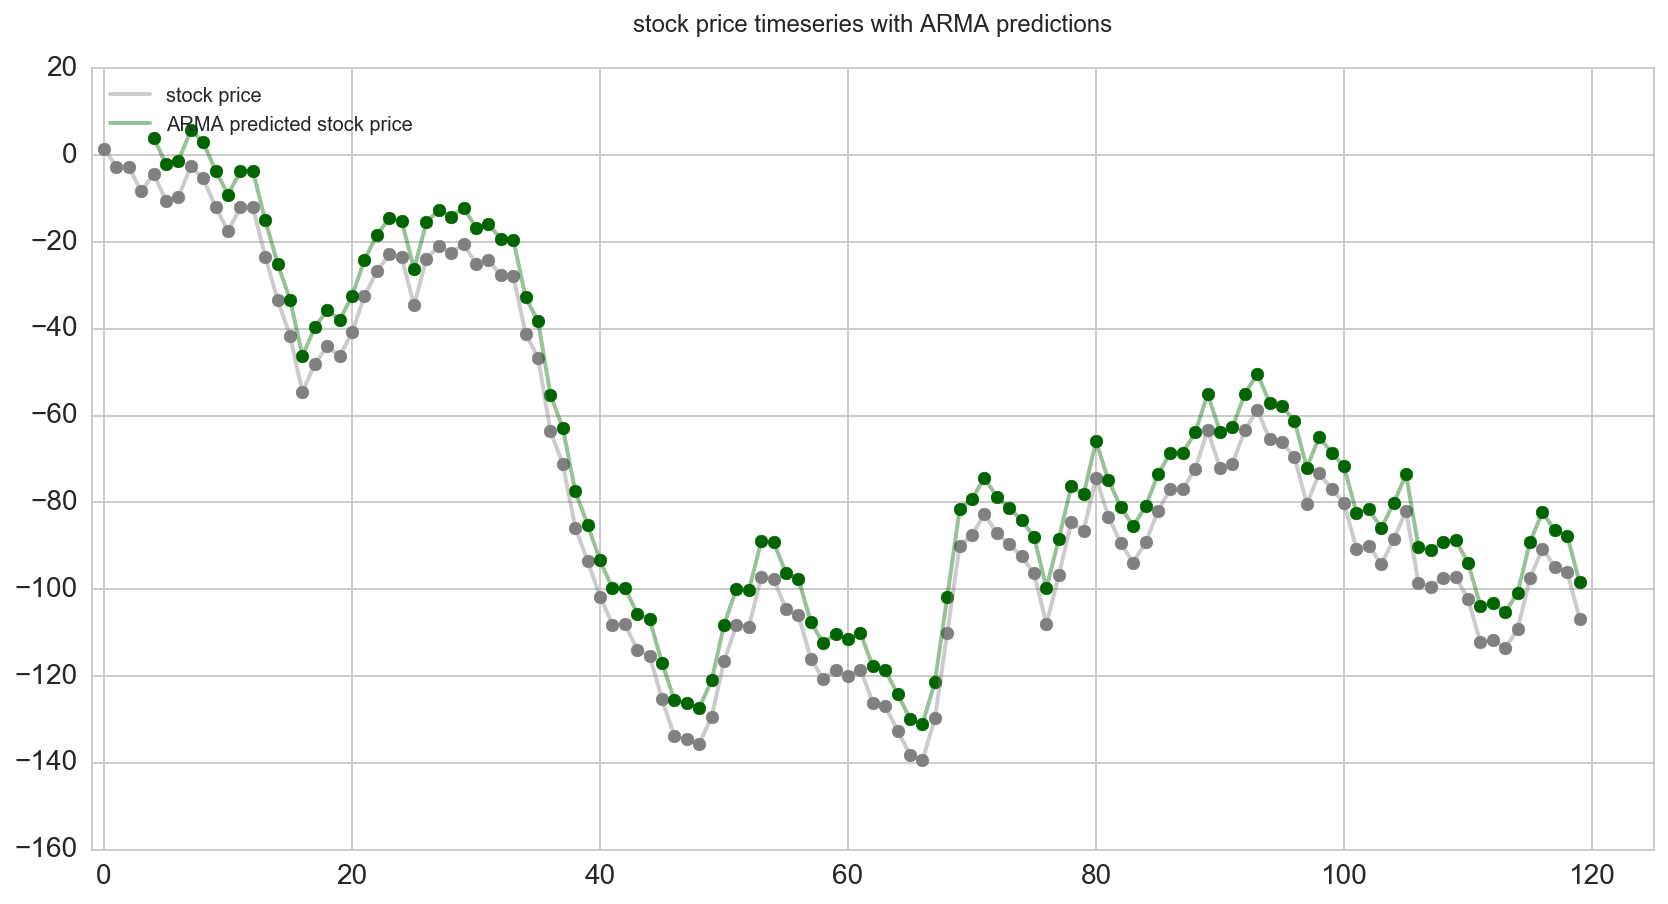

In [234]:
# plot the actual stock prices with ARMA predictions;

arma_pred_ts = np.cumsum(arma_predictions)

plt.figure(figsize=(14,7))
plt.title('stock price timeseries with ARMA predictions\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.plot(x_times[max_lag:], arma_pred_ts, lw=2, color='darkgreen', alpha=0.4, 
                 label="ARMA predicted stock price")
plt.scatter(x_times[max_lag:], arma_pred_ts, s=40, color='darkgreen')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()